# Dataset iris
dataset that contains information about three types of iris flowers: Setosa, Versicolour, and Virginica. Here are the key details:

* **Features**: The dataset includes measurements of sepal length, sepal width, petal
length, and petal width for 150 iris flowers.
* **Classes**: Each flower belongs to one of the three classes mentioned above.
* **Use Case**: It’s widely used for evaluating classification methods and visualizations.
* **Linear Separability**: While one class is linearly separable from the other two, the latter two are not linearly separable from each other.

In [ ]:
!pip install -q tfds-nightly tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 30.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
# Carregar o conjunto de dados Iris
iris = load_iris()

# Converter para um DataFrame do pandas para facilitar a visualização
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

# Exibir as primeiras linhas do DataFrame
print(df.head())
print(df.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  
(150, 5)


In [ ]:
x = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [ ]:
# transformer in one hot encoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes=3)
y_test_one_hot

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [52]:
classifier = Sequential()
classifier.add(Dense(units=4, activation='relu', input_dim=4))
classifier.add(Dense(units=4, activation='relu'))
# classifier 3 classes: Setosa, Versicolour, and Virginica
classifier.add(Dense(units=3, activation='softmax'))
# link loss function available https://keras.io/api/losses/
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
classifier.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 3)                   │              15 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
classifier.fit(X_train, y_train_one_hot, batch_size=10, epochs=1000)

Epoch 1/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.3116 - loss: 6.0425
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2916 - loss: 5.7269     
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2801 - loss: 5.3083 
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3658 - loss: 4.2580 
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3296 - loss: 4.0675 
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3025 - loss: 3.9427 
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.2678 - loss: 3.7581 
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3196 - loss: 3.1640 
Epoch 9/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3503 - loss: 2.8033 
Epoch 10/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3457 - loss: 2.5215 
Epoch 

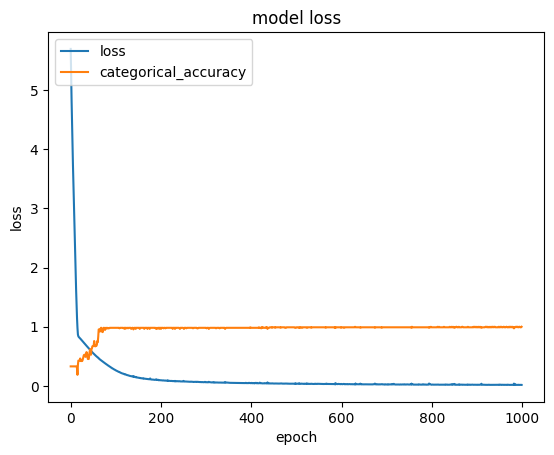

In [54]:
[44]
import matplotlib.pyplot as plt
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['categorical_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'categorical_accuracy'], loc='upper left')
plt.show()


# The Kullback-Leibler divergence (KL divergence)
Also known as relative entropy or I-divergence, is a statistical measure of how one probability distribution differs from another. Specifically, it quantifies the difference between two probability distributions, denoted as (P) and (Q)

In [59]:
classifier2 = Sequential()
classifier2.add(Dense(units=4, activation='relu', input_dim=4))
classifier2.add(Dense(units=4, activation='relu'))
# classifier 3 classes: Setosa, Versicolour, and Virginica
classifier2.add(Dense(units=3, activation='softmax'))
# using Kullback-Leibler divergence loss between y_true & y_pred.
classifier2.compile(optimizer='adam', loss='KLDivergence', metrics=['categorical_accuracy'])
classifier2.fit(X_train, y_train_one_hot, batch_size=10, epochs=1000)

Epoch 1/1000


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - categorical_accuracy: 0.3387 - loss: 1.1230
Epoch 2/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3391 - loss: 1.1163 
Epoch 3/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3456 - loss: 1.1013 
Epoch 4/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3178 - loss: 1.1038 
Epoch 5/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.2726 - loss: 1.0967  
Epoch 6/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.3697 - loss: 1.0941 
Epoch 7/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.3716 - loss: 1.0941 
Epoch 8/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4122 - loss: 1.0964 
Epoch 9/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - categorical_accuracy: 0.4051 - loss: 1.0924 
Epoch 10/1000
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - categorical_accuracy: 0.4758 - loss: 1.0905 
Epoch 11/1000
12/12 ━━

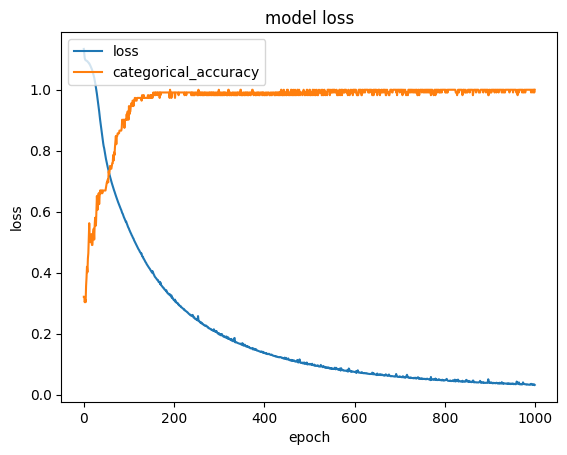

In [61]:
import matplotlib.pyplot as plt
plt.plot(classifier2.history.history['loss'])
plt.plot(classifier2.history.history['categorical_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'categorical_accuracy'], loc='upper left')
plt.show()